In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

%matplotlib inline

# a function to draw a plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    sv = svc.support_vectors_
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [2]:
landmarks = pd.read_csv('./data/tidyLandmarks.csv')
landmarks.head()

,landmark_index,sample_index,min_alpha,max_alpha,min_theta,max_theta,num,pts,r,stype
0,1,1,-14.29,-4.76,-0.79,0.00,50,1251,5.000388,mt-zrf
1,2,1,-14.29,-4.76,-1.57,-0.79,50,313,2.442931,mt-zrf
2,3,1,-14.29,-4.76,-2.36,-1.57,50,30,1.475318,mt-zrf
3,4,1,-14.29,-4.76,-3.14,-2.36,50,169,1.438607,mt-zrf
4,5,1,-14.29,-4.76,0.00,0.79,50,773,3.382828,mt-zrf


## SVM Method 

In [26]:
def svm_classification(landmarks, index):
    # filter out the landmarks needed
    chosenLandmark = landmarks[landmarks.landmark_index==index]
    chosenLandmark = chosenLandmark[np.isfinite(chosenLandmark['r'])]
    
    # create training and testing data
    X = chosenLandmark[['pts', 'r']]
    y = chosenLandmark['stype']
    y = y.replace(['mt-zrf'], 1)
    y = y.replace(['wt-zrf'], 0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2)
    
    # present the data
    plt.figure(figsize=(8, 5))
    plt.scatter(X.values[:,0], X.values[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
    # find the best C value by cross-validation
    tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100, 1000]}]
    clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
    clf.fit(X.values, y.values)
    best_c = clf.best_params_['C']
    
    svc = SVC(C=best_c, kernel='linear')
    svc.fit(X, y)
    
    plot_svc(svc, X.values, y)
    
    prediction = svc.predict(X)
    # print confusion matrix
    print("confusion matrix: ")
    cm = confusion_matrix(y, prediction)
    cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
    print(cm_df)
    print('Classification Report: ')
    print(classification_report(y, 
                            prediction,
                            digits = 3))
    return svc

## Testing SVM Method 

index: 0


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


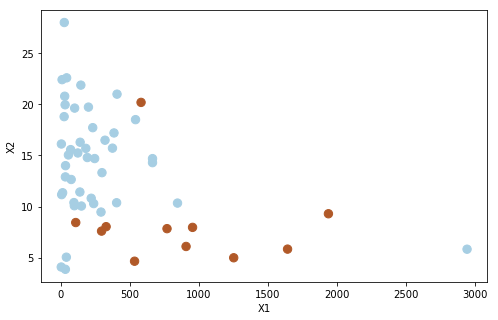

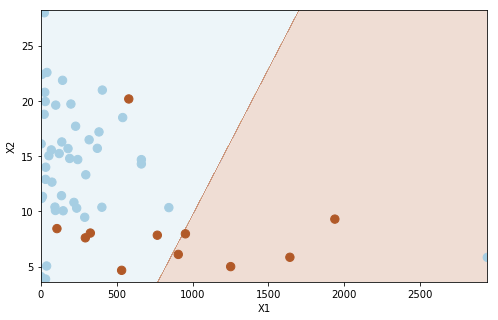

confusion matrix: 
    0  1
0  43  6
1   1  5
Classification Report: 
             precision    recall  f1-score   support

          0      0.878     0.977     0.925        44
          1      0.833     0.455     0.588        11

avg / total      0.869     0.873     0.857        55

index: 1


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


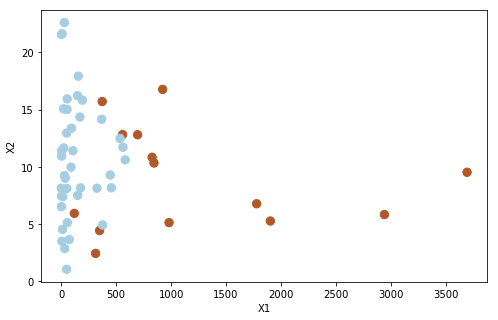

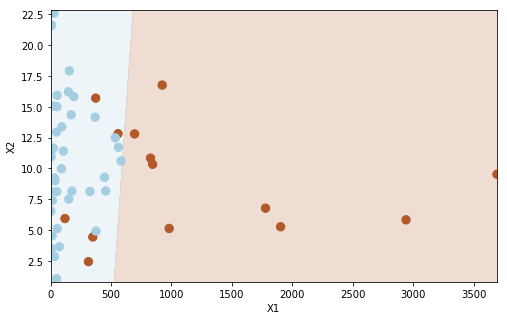

confusion matrix: 
    0  1
0  40  5
1   0  9
Classification Report: 
             precision    recall  f1-score   support

          0      0.889     1.000     0.941        40
          1      1.000     0.643     0.783        14

avg / total      0.918     0.907     0.900        54

index: 2


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


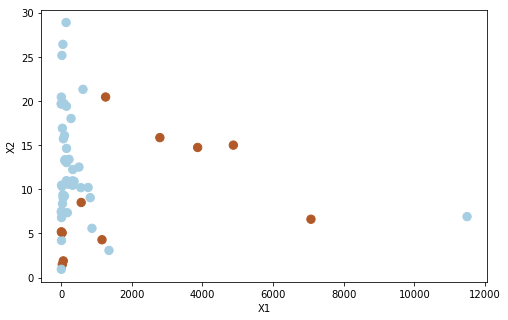

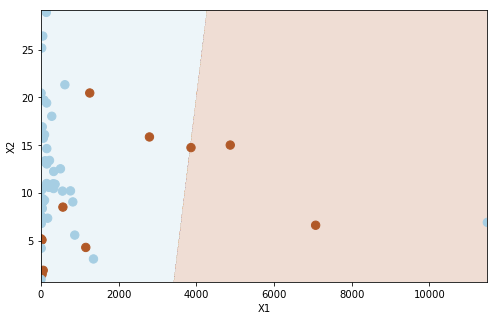

confusion matrix: 
    0  1
0  42  8
1   1  3
Classification Report: 
             precision    recall  f1-score   support

          0      0.840     0.977     0.903        43
          1      0.750     0.273     0.400        11

avg / total      0.822     0.833     0.801        54

index: 3


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


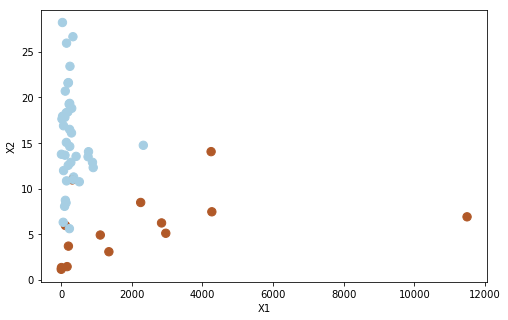

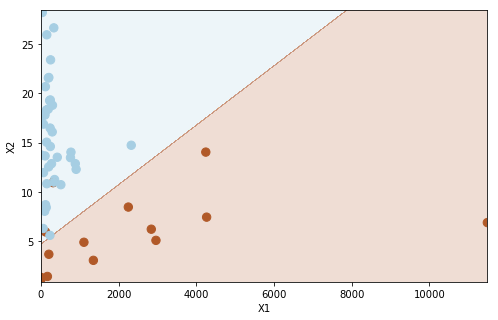

confusion matrix: 
    0   1
0  40   2
1   0  12
Classification Report: 
             precision    recall  f1-score   support

          0      0.952     1.000     0.976        40
          1      1.000     0.857     0.923        14

avg / total      0.965     0.963     0.962        54

index: 4


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


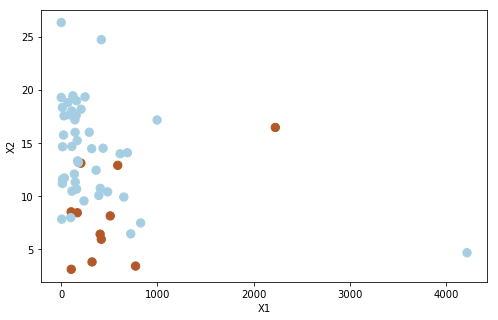

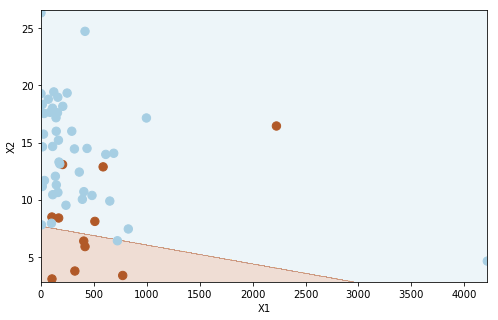

confusion matrix: 
    0  1
0  44  6
1   1  5
Classification Report: 
             precision    recall  f1-score   support

          0      0.880     0.978     0.926        45
          1      0.833     0.455     0.588        11

avg / total      0.871     0.875     0.860        56

index: 5


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


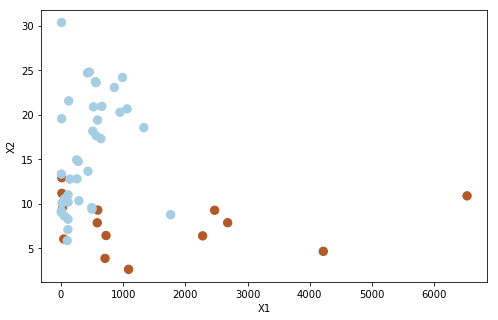

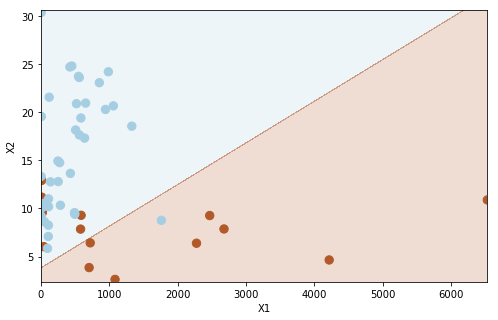

confusion matrix: 
    0  1
0  37  6
1   1  8
Classification Report: 
             precision    recall  f1-score   support

          0      0.860     0.974     0.914        38
          1      0.889     0.571     0.696        14

avg / total      0.868     0.865     0.855        52

index: 6


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


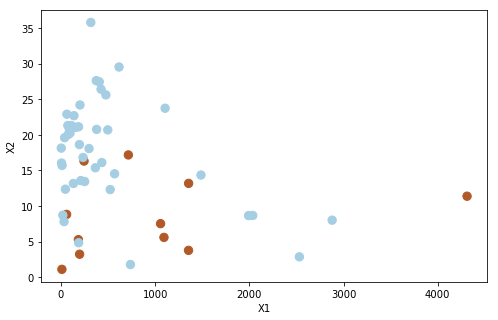

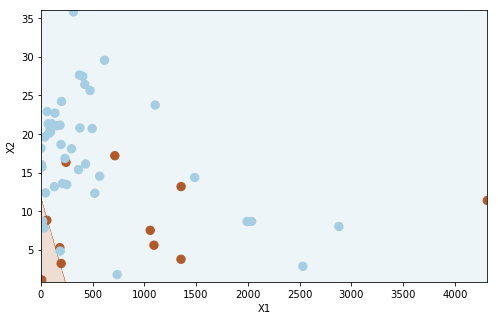

confusion matrix: 
    0  1
0  41  9
1   2  2
Classification Report: 
             precision    recall  f1-score   support

          0      0.820     0.953     0.882        43
          1      0.500     0.182     0.267        11

avg / total      0.755     0.796     0.756        54

index: 7


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


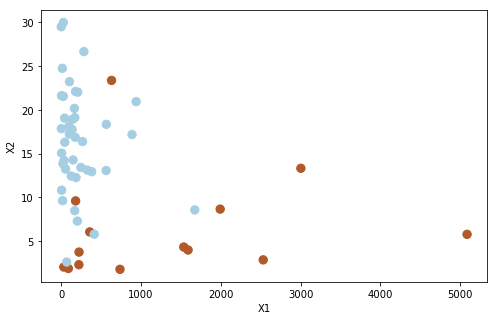

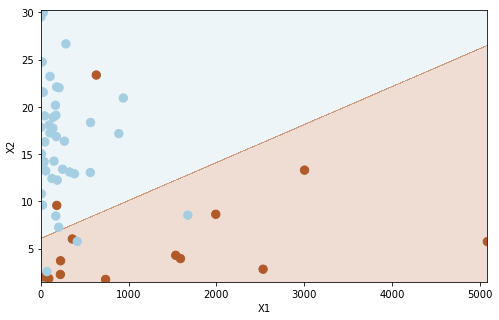

confusion matrix: 
    0   1
0  39   2
1   3  12
Classification Report: 
             precision    recall  f1-score   support

          0      0.951     0.929     0.940        42
          1      0.800     0.857     0.828        14

avg / total      0.913     0.911     0.912        56

index: 8


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


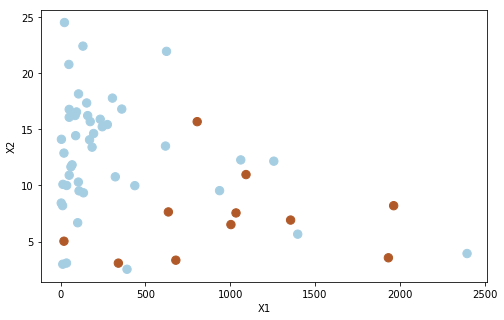

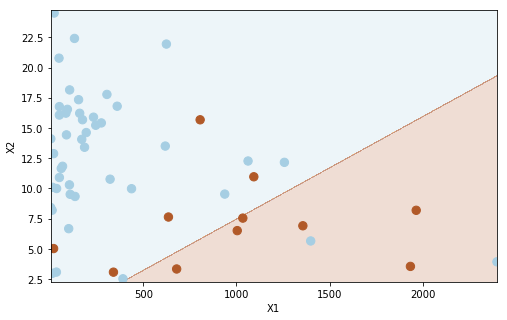

confusion matrix: 
    0  1
0  43  5
1   2  6
Classification Report: 
             precision    recall  f1-score   support

          0      0.896     0.956     0.925        45
          1      0.750     0.545     0.632        11

avg / total      0.867     0.875     0.867        56

index: 9


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


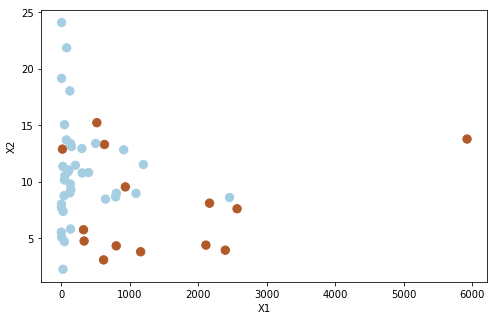

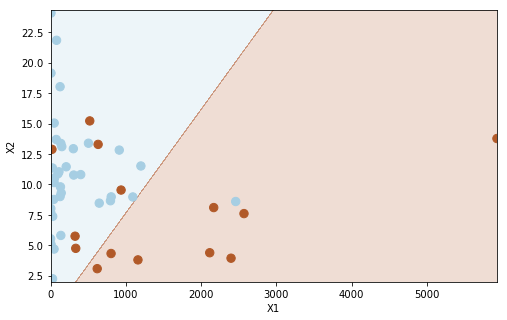

confusion matrix: 
    0  1
0  36  6
1   1  8
Classification Report: 
             precision    recall  f1-score   support

          0      0.857     0.973     0.911        37
          1      0.889     0.571     0.696        14

avg / total      0.866     0.863     0.852        51



In [4]:
for i in range(10):
    print("index: " + str(i))
    svm_classification(landmarks, i+1)

### Testing One Sample

In [20]:
sample_1 = landmarks[landmarks.sample_index==1]
sample_1 = sample_1[np.isfinite(sample_1['r'])]
landmarks_1 = sample_1['landmark_index']

landmark:  1


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


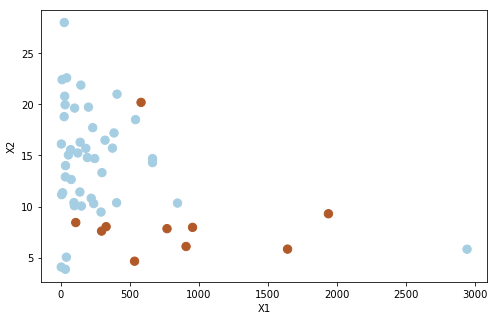

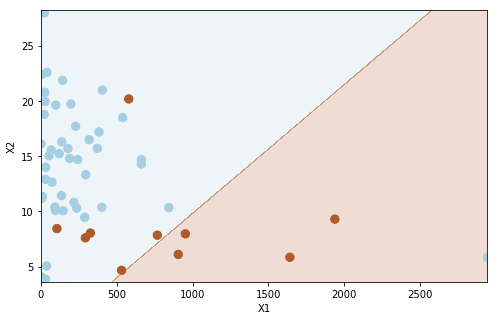

confusion matrix: 
    0  1
0  43  6
1   1  4
Classification Report: 
             precision    recall  f1-score   support

          0      0.878     0.977     0.925        44
          1      0.800     0.400     0.533        10

avg / total      0.863     0.870     0.852        54

[(1, 1)]
landmark:  2


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


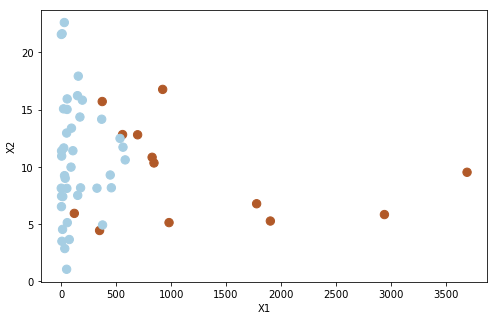

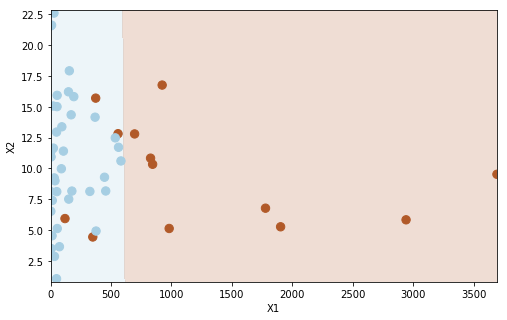

confusion matrix: 
    0  1
0  40  4
1   0  9
Classification Report: 
             precision    recall  f1-score   support

          0      0.909     1.000     0.952        40
          1      1.000     0.692     0.818        13

avg / total      0.931     0.925     0.919        53

[(1, 1), (2, 1)]
landmark:  3


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


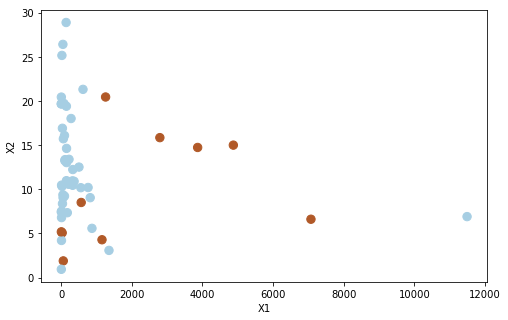

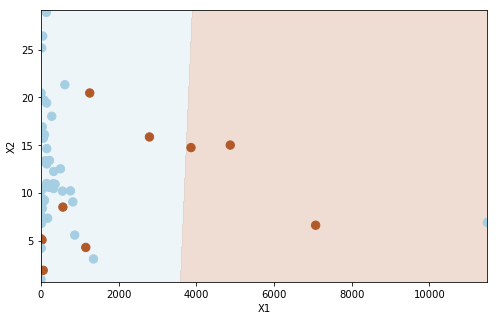

confusion matrix: 
    0  1
0  42  7
1   1  3
Classification Report: 
             precision    recall  f1-score   support

          0      0.857     0.977     0.913        43
          1      0.750     0.300     0.429        10

avg / total      0.837     0.849     0.822        53

[(1, 1), (2, 1), (3, 0)]
landmark:  4


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


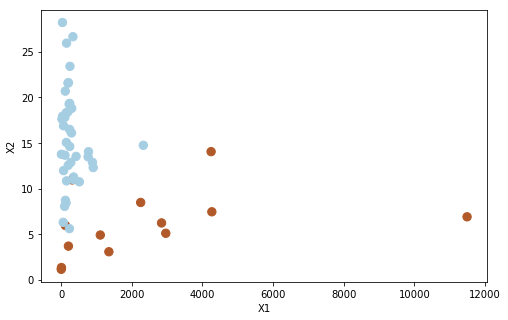

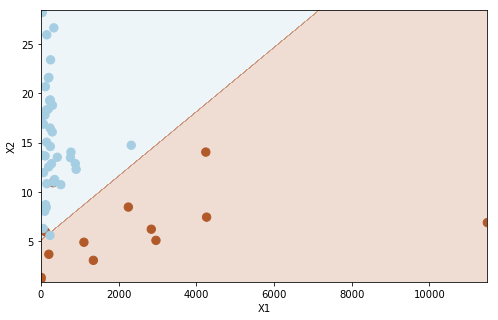

confusion matrix: 
    0   1
0  39   2
1   1  11
Classification Report: 
             precision    recall  f1-score   support

          0      0.951     0.975     0.963        40
          1      0.917     0.846     0.880        13

avg / total      0.943     0.943     0.943        53

[(1, 1), (2, 1), (3, 0), (4, 1)]
landmark:  5


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


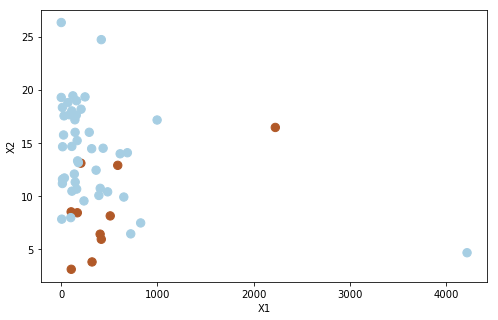

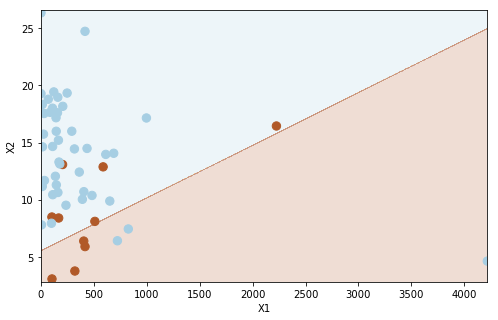

confusion matrix: 
    0  1
0  42  6
1   3  4
Classification Report: 
             precision    recall  f1-score   support

          0      0.875     0.933     0.903        45
          1      0.571     0.400     0.471        10

avg / total      0.820     0.836     0.825        55

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1)]
landmark:  6


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


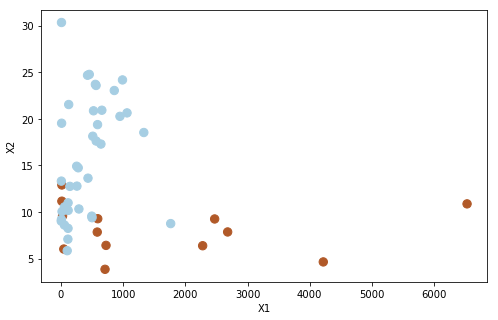

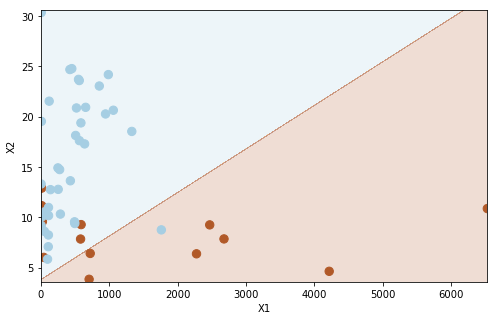

confusion matrix: 
    0  1
0  37  6
1   1  7
Classification Report: 
             precision    recall  f1-score   support

          0      0.860     0.974     0.914        38
          1      0.875     0.538     0.667        13

avg / total      0.864     0.863     0.851        51

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1)]
landmark:  7


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


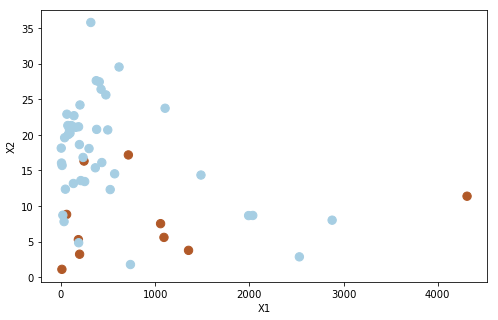

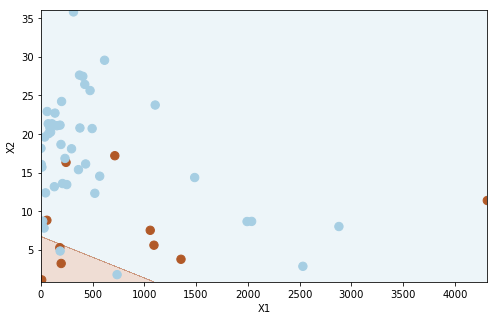

confusion matrix: 
    0  1
0  41  7
1   2  3
Classification Report: 
             precision    recall  f1-score   support

          0      0.854     0.953     0.901        43
          1      0.600     0.300     0.400        10

avg / total      0.806     0.830     0.807        53

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0)]
landmark:  8


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


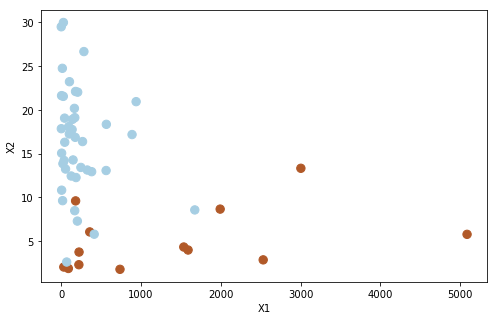

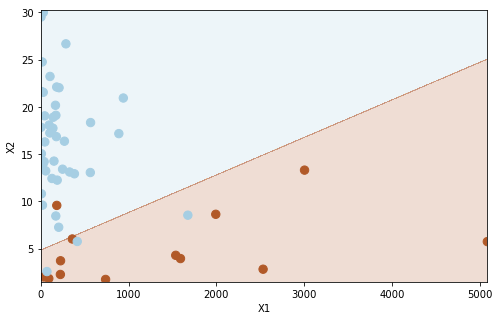

confusion matrix: 
    0   1
0  39   1
1   3  12
Classification Report: 
             precision    recall  f1-score   support

          0      0.975     0.929     0.951        42
          1      0.800     0.923     0.857        13

avg / total      0.934     0.927     0.929        55

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0), (8, 1)]
landmark:  9


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


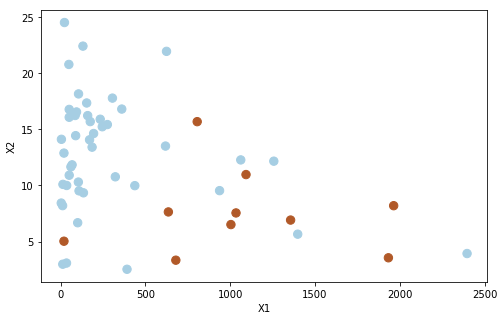

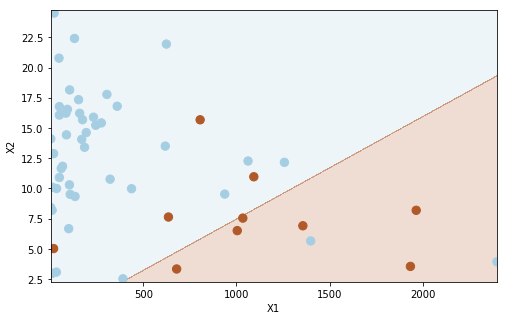

confusion matrix: 
    0  1
0  43  4
1   2  6
Classification Report: 
             precision    recall  f1-score   support

          0      0.915     0.956     0.935        45
          1      0.750     0.600     0.667        10

avg / total      0.885     0.891     0.886        55

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0), (8, 1), (9, 1)]
landmark:  10


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


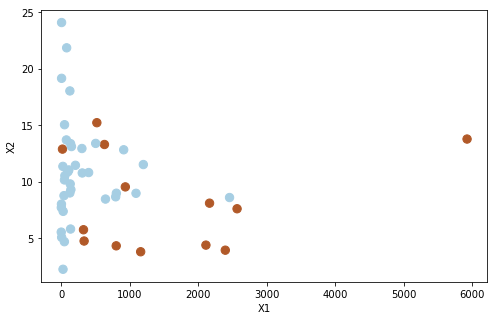

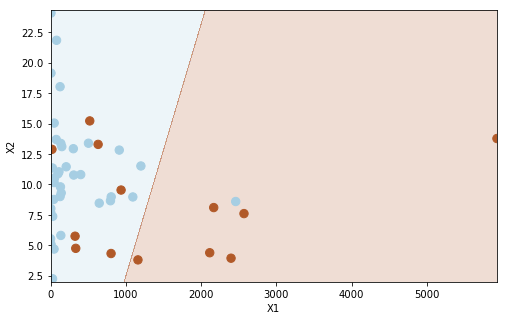

confusion matrix: 
    0  1
0  36  7
1   1  6
Classification Report: 
             precision    recall  f1-score   support

          0      0.837     0.973     0.900        37
          1      0.857     0.462     0.600        13

avg / total      0.842     0.840     0.822        50

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0), (8, 1), (9, 1), (10, 1)]
landmark:  11


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


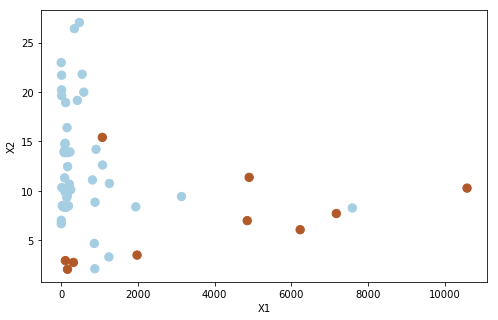

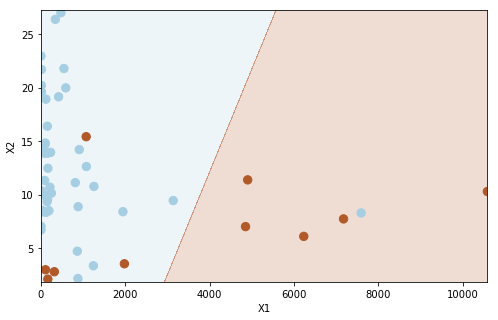

confusion matrix: 
    0  1
0  41  5
1   1  5
Classification Report: 
             precision    recall  f1-score   support

          0      0.891     0.976     0.932        42
          1      0.833     0.500     0.625        10

avg / total      0.880     0.885     0.873        52

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0), (8, 1), (9, 1), (10, 1), (11, 0)]
landmark:  12


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


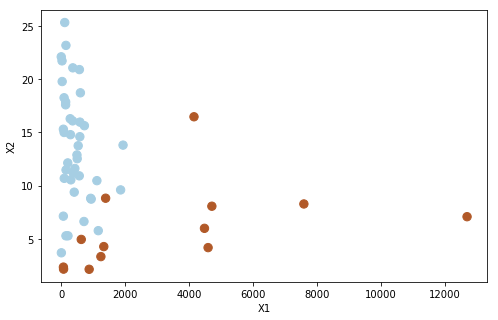

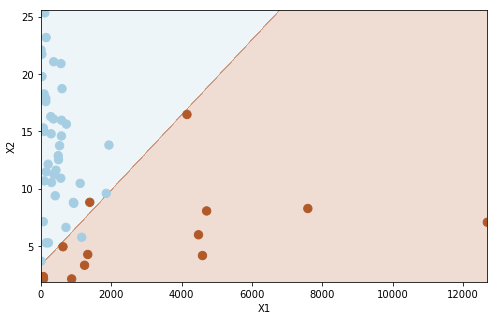

confusion matrix: 
    0   1
0  40   1
1   1  12
Classification Report: 
             precision    recall  f1-score   support

          0      0.976     0.976     0.976        41
          1      0.923     0.923     0.923        13

avg / total      0.963     0.963     0.963        54

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0), (8, 1), (9, 1), (10, 1), (11, 0), (12, 1)]
landmark:  13


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


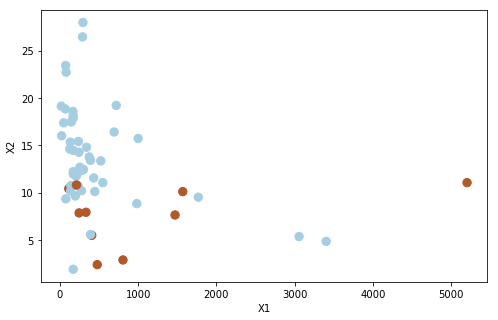

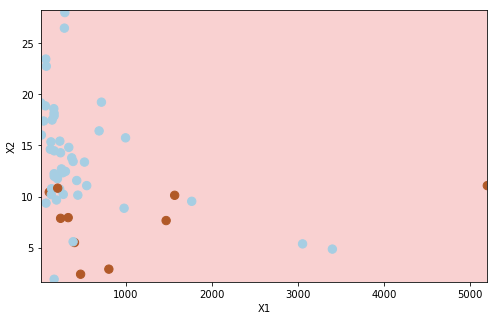

confusion matrix: 
    0   1
0  45  10
1   0   0
Classification Report: 
             precision    recall  f1-score   support

          0      0.818     1.000     0.900        45
          1      0.000     0.000     0.000        10

avg / total      0.669     0.818     0.736        55

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0), (8, 1), (9, 1), (10, 1), (11, 0), (12, 1), (13, 0)]
landmark:  14


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


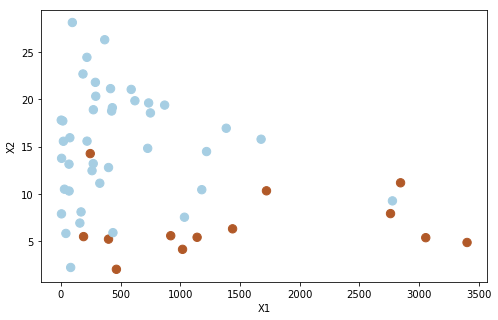

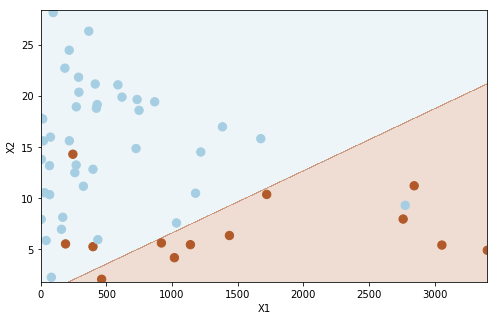

confusion matrix: 
    0   1
0  40   3
1   1  10
Classification Report: 
             precision    recall  f1-score   support

          0      0.930     0.976     0.952        41
          1      0.909     0.769     0.833        13

avg / total      0.925     0.926     0.924        54

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0), (8, 1), (9, 1), (10, 1), (11, 0), (12, 1), (13, 0), (14, 1)]
landmark:  15


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


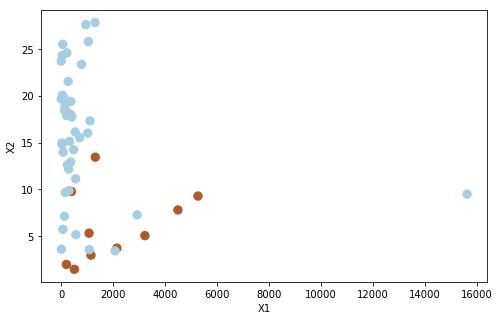

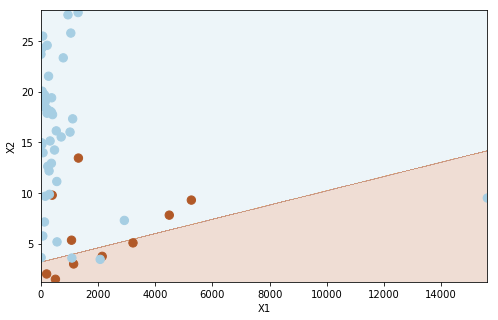

confusion matrix: 
    0  1
0  41  5
1   3  5
Classification Report: 
             precision    recall  f1-score   support

          0      0.891     0.932     0.911        44
          1      0.625     0.500     0.556        10

avg / total      0.842     0.852     0.845        54

[(1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 0), (8, 1), (9, 1), (10, 1), (11, 0), (12, 1), (13, 0), (14, 1), (15, 0)]
landmark:  16


/Users/dejiatang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


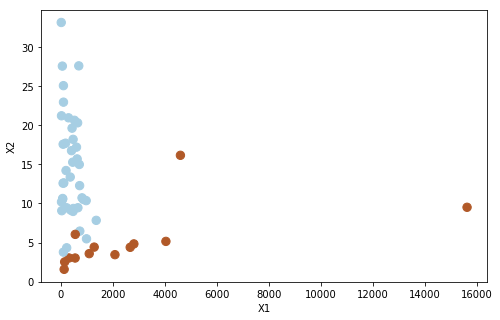

In [ ]:
results = []
for l in landmarks_1.values:
    print ("landmark: ", str(l))
    svc = svm_classification(landmarks[landmarks.sample_index!=1], l)
    prediction = svc.predict(sample_1[sample_1.landmark_index==1][['pts', 'r']])
    results.append((l, prediction[0]))
    print(results)